# EigenFaces

Before we begin make sure you read the pdf document fully and that you did not change the order of folders or files. Keep the same order as in the zip file of HW3. For this assignment by the way, there is no need to divide the data into training and testing sets.

In [6]:
import numpy as np
import itertools
from tqdm import tqdm
import pickle
import sys
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from IPython.display import display, clear_output
%load_ext autoreload
%autoreload 2
from PIL import Image
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
!pip install pillow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will start by loading a dataset of human faces from `X.npy` and the names of these people from `targets.pkl`:

In [2]:
X = np.load('Data/X.npy')
h = 62
w = 47
with open('Data/targets.pkl', 'rb') as f:
    y, target_names = pickle.load(f)
print("Dataset images are at the shape of {}X{}".format(h,w))
print("Number of images within the dataser is: {}".format(len(X)))

Dataset images are at the shape of 62X47
Number of images within the dataser is: 13233


13,233 images were flattened and stacked in the matrix $X$ so every row is an image and every column is a pixel. We can see that by the shape of $X$.

In [3]:
print(X.shape)

(13233, 2914)


Let's see some of the images of the original dataset:

In [4]:
def plot_gallery(images,target_names, h, w,rows=3, cols=4):
    plt.figure(figsize=(14,14))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i, :].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(target_names[i])
        plt.xticks(())
        plt.yticks(())
    plt.show()

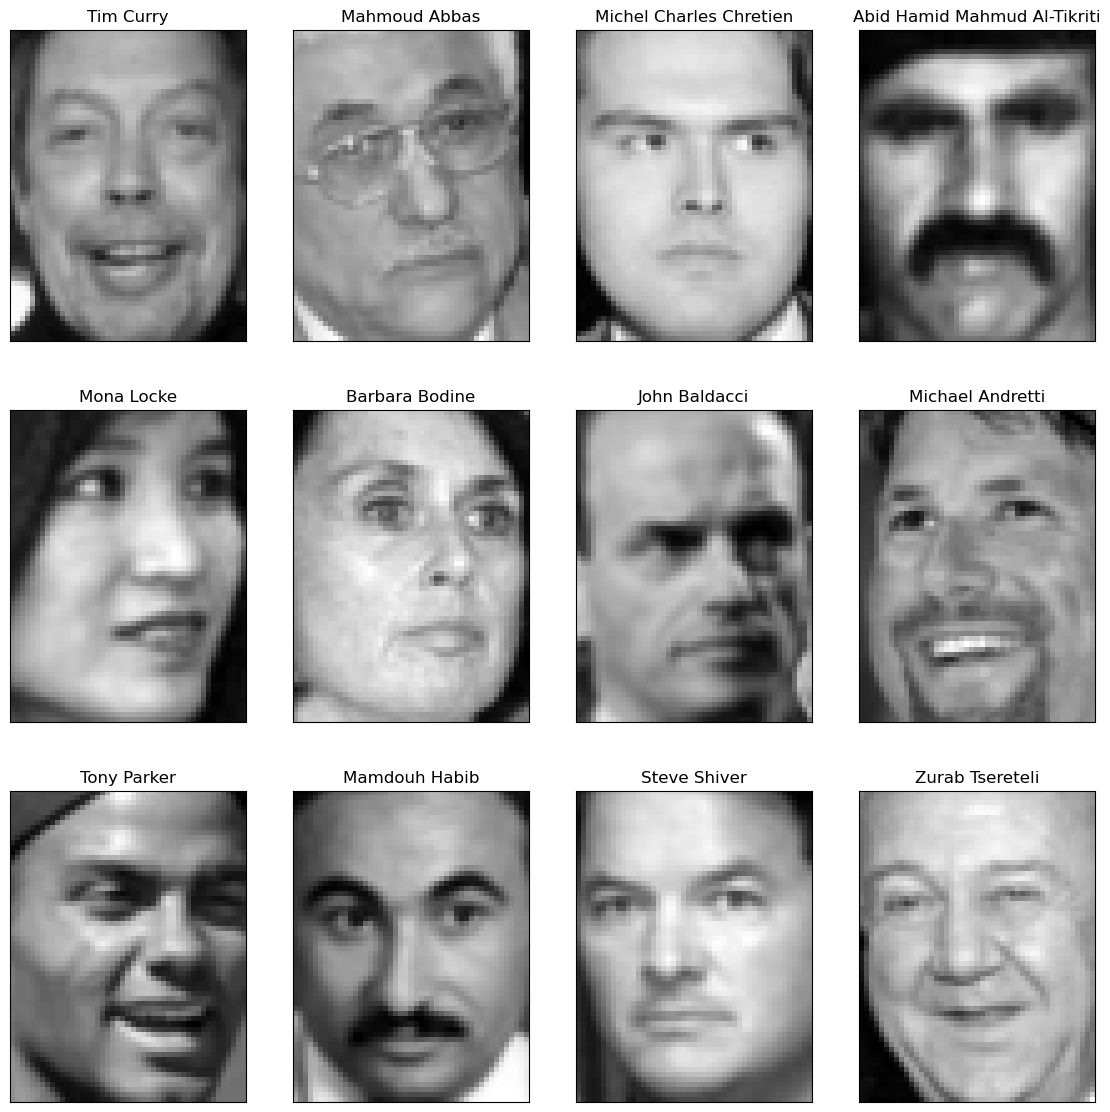

In [5]:
plot_gallery(X, target_names, h, w)

Before we use the `PCA` package, we have to center our data (even though `pca.fit_transform()` does it automatically, here we will do it for practicing). The center of our data ($\mu$) is the mean of each pixel along all of our images. Thus, the center has 2,914 elements where the first element is the mean of all of the images' "first" pixels, the second is the mean of all of the images' "second" pixels etc. Notice that the images are already flattened in $X$ which might help you.

Name your `pca` object: `pca`.

Calculate $\mu$ of $X$ and center every image in $X$ (row vector) according to $\mu$. Keep $X$ with same name `X`. Name the $\mu$ vector `mu_orig`.

Use 2 different methods for centering the data, one with sklearn, and one without, in both cases without using any loop

In [52]:
#----------------------------Implement your code here-----------------------
# Method 1: Manually center the data (no loop, no sklearn)
mu_orig = np.mean(X, axis=0)  # Compute the mean of each column
X = X - mu_orig  # Center the data by subtracting the mean

# Method 2: Center the data using sklearn
scaler = StandardScaler(with_std=False)  # Only center, no standardization
X_sklearn = scaler.fit_transform(X)  # Center the data using sklearn

#---------------------------------------------------------------------------

Now fit a PCA model on $X$ (**without whitening**) that would preserve 99.5% of the energy. Find out how many eigenvectors you remained with and set it as $K$.

In [51]:
#----------------------------Implement your code here-----------------------
pca = PCA(n_components=0.995)  # Keep 99.5% of the energy
X_pca = pca.fit_transform(X)  # Apply PCA on the centered data

# Get the number of eigenvectors retained
K = pca.n_components_

print(f"Number of eigenvectors retained: {K}")
#---------------------------------------------------------------------------

Number of eigenvectors retained: 734


---

<span style="color:red">***Question:***</span> *If we now have $K$ eigenvectors, by how many dimensions we have reduced our data?*

---

---

<span style="color:red">***The reduction in dimensions is d−K, 2914 - 734 = 2180. We have 2180d to reduce our data.***</span> 

---

Let's see these eigenfaces!

In [22]:
def plot_eigenfaces(eigenvec_mat, h, w, rows=3, cols=4):
    plt.figure(figsize=(10,10))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(eigenvec_mat[i, :].reshape((h, w)), cmap=plt.cm.gray)
        plt.title("$u_{" + str(i+1) + "}$")
        plt.xticks(())
        plt.yticks(())
    plt.show()

`eigenvec_mat` is the matrix of the eigenvectors calculated where every row is an eigenvector and the first row has the highest eigenvalue and the second row has the next highest eigenvalue etc. Think where this matrix was calculated in the process.

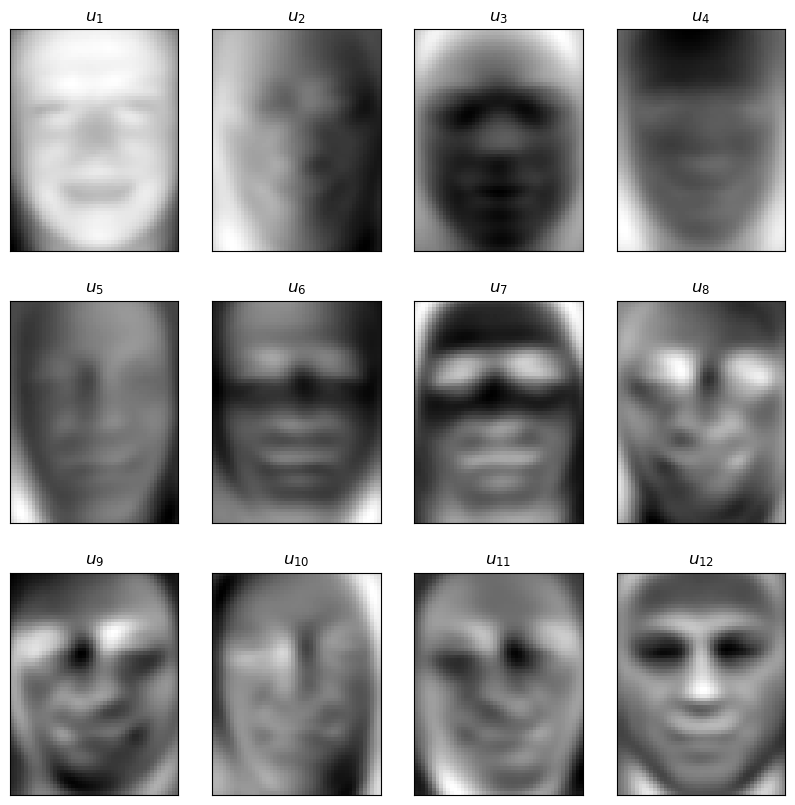

In [21]:
eigenvec_mat = pca.components_
plot_eigenfaces(eigenvec_mat, h, w)

If you got it right, you should see those "ghosts" we talked about.

Now modify the function plot_eigenfaces to show the eigenvectors with the lowest eigenvalues. How would you interpret the difference with the previous "ghosts" you were seeing ?


And now, let's move on towards the more interesting part! We will start by showing your resized gray level face image. It might be a bit distorted due to resizing. Change the format of `.jpg` as needed.

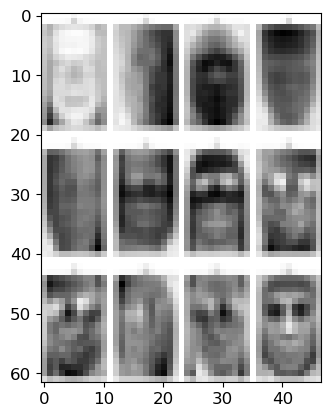

In [29]:
img_format = '.png' # change the format according to your image. Do not delete the dot sign before the format name
image = Image.open('Data/Orig' + img_format)
gray = image.convert('L')
g = gray.resize((w, h))
orig = np.asarray(g).astype('float32')
plt.imshow(orig, cmap=plt.cm.gray)
plt.grid(False)

Now we should flatten our image and center it by the same $\mu$ vector you calculated before.

In [30]:
flattened_img = np.asarray(g).astype('float32').flatten()
flattened_img -= mu_orig

Define `U` to be the matrix containing the first K eigenvectors (rows) extracted from `eigenvec_mat`. Now, calculate the projections $c_i$ so you would have a vector with $K$ elements where the first element is $c_1$ and the second is $c_2$ etc. Relate to the pdf if you are not sure. **Note:** you can only use `U`, your flattened imgae and `numpy` for this section. **Do not apply `pca` methods for calculating the projections.**

In [31]:
#----------------------------Implement your code here-----------------------
# Take the first K eigenvectors from eigenvec_mat
U = eigenvec_mat[:K, :]  

# Flatten the image to a vector (e.g., "orig" is the test image)
flattened_image = orig.flatten()  

# Compute the projections (coefficients c_i)
c = np.dot(U, flattened_image)  

# Display the result
print(f"Projections c_i: {c}")

#--------------------------------------------------------------------------

Projections c_i: [ 7.96924023e+03  7.35175049e+02  8.29863281e+02  1.48514929e+03
 -5.18699768e+02  1.56693146e+02  6.17358521e+02  8.06664490e+02
 -4.62752747e+02 -1.91400558e+02 -3.11072876e+02 -4.53223816e+02
  2.81583832e+02  1.45310333e+02 -3.06066711e+02  2.17904114e+02
 -1.16048798e+02 -6.88452682e+01  7.35791992e+02  2.97042328e+02
  1.75137756e+02 -3.00288452e+02 -5.17475586e+02  3.11340759e+02
  3.82130859e+02 -2.78880432e+02 -4.67530273e+02 -1.35764282e+02
  3.37403564e+02  1.14323441e+02  3.28000832e+01 -2.42175407e+01
 -5.18358887e+02 -3.58545715e+02 -2.22420441e+02  2.55133240e+02
 -8.03849335e+01 -3.64029236e+01  3.31228790e+02  2.31780029e+02
  4.51878784e+02  6.34064636e+01 -1.99118011e+02 -2.88073547e+02
  3.21206329e+02 -2.29867722e+02 -1.07022476e+00 -5.46829102e+02
 -3.94816650e+02  1.14627357e+02  1.63147919e+02  1.93410507e+02
 -1.24451996e+02 -1.38962688e+01  3.29479370e+02  3.51935303e+02
 -3.51432312e+02 -1.79414825e+02 -6.64442368e+01 -2.28846378e+01
  1.4131

If you got it all correct, then the cell below will show you how your face is reconstructed as a linear combination of the eigenfaces which actually means that your face is a linear combination of other people's faces! The coefficients will appear with their adequate sign in the title in the left and the image constructed will appear slowly on the right.


The code snipped *corrected_image = s* is wrong because it lacks correction to a preprocessing step we applied. How would you fix it ?

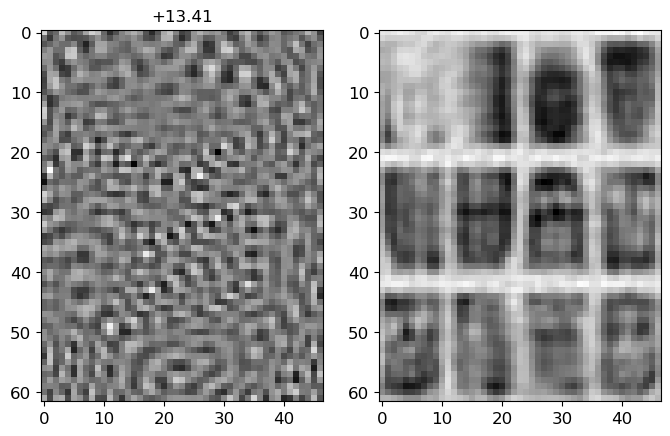

In [42]:
s = np.zeros((h*w,))
fig, axes = plt.subplots(1, 2,figsize=(8,8))
for j in range(K):
    s += c[j]*U[j, :]
    if np.mod(j, 10) == 0:
        axes[0].imshow(U[j, :].reshape((h, w)), cmap=plt.cm.gray)
        axes[0].grid(False)
        #----------------------------Implement your code here-----------------------
        corrected_image = s + mu_orig  # Add the mean back to reverse centering
        #--------------------------------------------------------------------------
        axes[1].imshow(corrected_image.reshape((h, w)), cmap=plt.cm.gray)
        axes[1].grid(False)
        if c[j] < 0:
            axes[0].set_title('{:.2f}'.format(c[j]))
        else:
            axes[0].set_title('+{:.2f}'.format(c[j]))
        display(fig)
        clear_output(wait = True)
        plt.pause(0.3)
        if c[j] > 0:
            p = '+' + str(c[j])
        else:
            p = str(c[j])

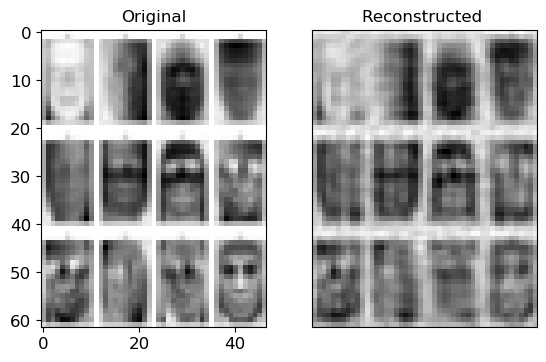

In [43]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(orig, cmap=plt.cm.gray) 
axes[0].title.set_text('Original')
axes[0].grid(False)
plt.xticks(())
plt.yticks(())
axes[1].imshow(corrected_image.reshape((h, w)), cmap=plt.cm.gray)
axes[1].title.set_text('Reconstructed ')
axes[1].grid(False)
plt.xticks(())
plt.yticks(())
plt.show()

Hopefully, you got a nice reconstruction from those "ghosts". Now, we will continue to the face recognition part. 

Facebook has also learned the natural basis of human faces using a database of different faces much like you did here. Now, some of your images are tagged (labeled) in a larger (mostly different) database with your name. It then projects the images on the PCA axes and gets an "id" ($c$ coefficients) for each and every image in the tagged database. When someone uploades a picture without tagging, Facebook uses the same learned PCA in order to create this new image an id . and then looks through the tagged id database for comparison. The closest match (user) will get a notification whether or not he\she would like to be tagged according to the match.

We will make a simple simulation. First we will create a tagged database, which in our case will simply be `X` concatenated with your "Orig" flattened and centered image. We will call it `X_new`.

In [44]:
X_new = X.copy()
X_new = np.vstack([X_new, flattened_img])
X_new.shape

(13234, 2914)

Notice that the number of rows was increased by 1 accordingly. Now we will add your name. Fill your name as a string below:

In [45]:
name = "Yohan"
target_new = target_names.copy()
target_new = np.append(target_names, name)
target_new.shape

(13234,)

Let's shuffle the databse:

In [46]:
from sklearn.utils import shuffle
X_new, y_new = shuffle(X_new, target_new, random_state=0)

Now let's simulate a new uploaded untagged (out of the database) image and show it. You can use either "tilt1" or "tilt2". Then we will also center it.

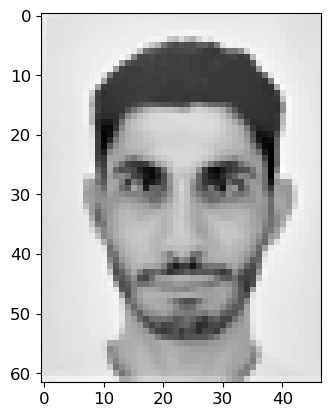

In [47]:
img_format = '.jpg' # change the format according to your image. Do not delete the dot sign before the format name
image = Image.open('Data/tilt1' + img_format)  #change the name if needed
gray = image.convert('L')
g = gray.resize((w, h))
new_input = np.asarray(g).astype('float32')
plt.imshow(new_input, cmap=plt.cm.gray)
plt.grid(False)

In [48]:
flattened_img_new = np.asarray(g).astype('float32').flatten()
flattened_img_new -= mu_orig

And now for the recognition part:
First, project the new database onto the **already fitted** PCA basis. You can use `pca` methods. Then calculate the projections (`c` vector) for the new input similarly to what you did before. Then run in a for loop and measure the Euclidean distance between the new output projection to each and everyone of the projections of the new database. Finally return the index (row number) of the best matching image in the database (minimal distance) and name it as `idx_match`.

In [49]:
#----------------------------Implement your code here-----------------------
# Project the new database onto the PCA basis
X_new_pca = pca.transform(X_new)  # Project the entire new database
c_new = np.dot(U, flattened_image)  # Calculate projections for the new input

# Initialize variables for recognition
min_distance = float('inf')
idx_match = -1

# Loop through the new database projections and compute Euclidean distances
for i, c_i in enumerate(X_new_pca):
    distance = np.linalg.norm(c_new - c_i)  # Compute Euclidean distance
    if distance < min_distance:  # Update minimum distance and index if necessary
        min_distance = distance
        idx_match = i

# Output the index of the best match
print(f"Index of the best matching image: {idx_match}")
print(f"Name associated with the match: {target_new[idx_match]}")

#--------------------------------------------------------------------------

Index of the best matching image: 700
Name associated with the match: Halbert Fillinger


Let's see if you got it right. If so, on left image you would see your tilted untagged image and on the right the best matching image of the database.

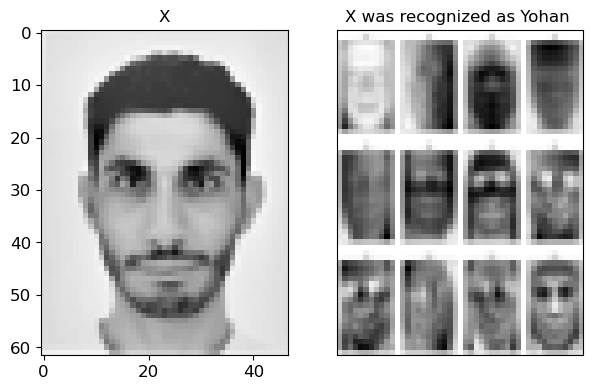

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(7,7))
axes[0].imshow(new_input, cmap=plt.cm.gray) 
axes[0].title.set_text('X')
axes[0].grid(False)
plt.xticks(())
plt.yticks(())
axes[1].imshow((X_new[idx_match, :] + mu_orig).reshape((62, 47)), cmap=plt.cm.gray)
axes[1].title.set_text('X was recognized as {} '.format(y_new[idx_match]))
axes[1].grid(False)
plt.xticks(())
plt.yticks(())
plt.show()

The power of PCA is the ability to find your image across 13,324 images with using only Euclidien distance of $K$ elements vectors rather using image matching techniques involving higher dimensional data, computational power and mostly morphlogical priors and filters! Try it also for the second image and check if it worked.

Notice that even if it failed to recognize you but the code was correct, you will get the full credit points for this section.

Hope you enjoyed :)